In [1]:
#20160386 somin
#8-1-1
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


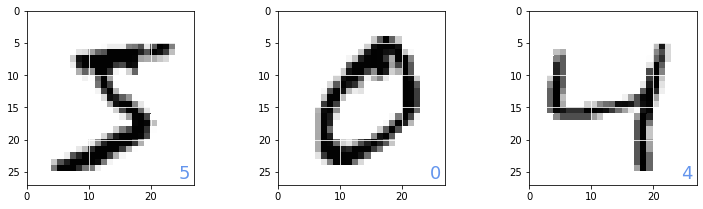

In [4]:
#20160386 somin
#8-1-2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
            color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')

plt.show()

In [5]:
#20160386somin
#8-1-3
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [6]:
#20160386 somin
#8-1-4
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(), metrics=['accuracy'])

In [7]:
#20160386 somin
#8-1-5
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 2.0863 - accuracy: 0.2787 - val_loss: 1.8118 - val_accuracy: 0.5592
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 1.6278 - accuracy: 0.6916 - val_loss: 1.4524 - val_accuracy: 0.7723
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 1.3243 - accuracy: 0.7917 - val_loss: 1.1922 - val_accuracy: 0.8163
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 1.0968 - accuracy: 0.8280 - val_loss: 0.9954 - val_accuracy: 0.8469
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.9266 - accuracy: 0.8518 - val_loss: 0.8491 - val_accuracy: 0.8612
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8003 - accuracy: 0.8665 - val_loss: 0.7402 - val_accuracy: 0.8725
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.7056 - accuracy: 0.8757 - val_loss: 0.6581 - val_accuracy: 0.8814
Epoch 8/10
60/60 [==

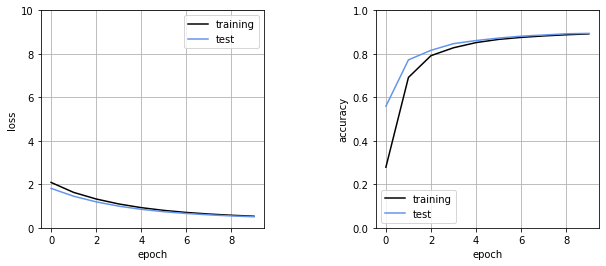

In [10]:
#20160386 somin
#8-1-6
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

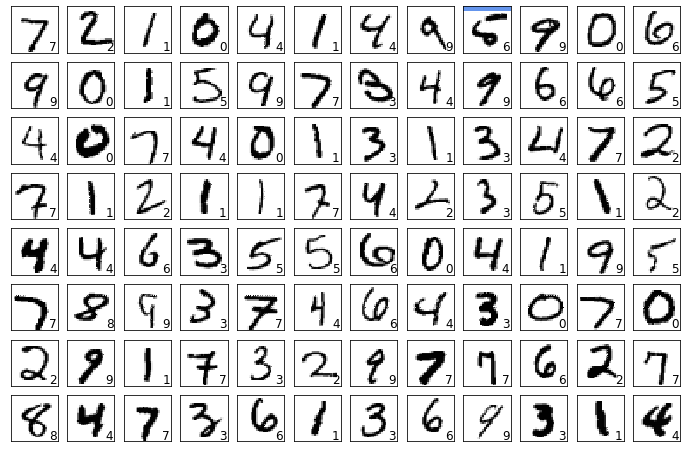

In [5]:
#20160386 somin
#8-1-7
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27],[1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    
show_prediction()
plt.show()

In [13]:
#20160386 somin
#8-1-8
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 8ms/step - loss: 1.4732 - accuracy: 0.6388 - val_loss: 0.8251 - val_accuracy: 0.8344
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6434 - accuracy: 0.8509 - val_loss: 0.4948 - val_accuracy: 0.8776
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4545 - accuracy: 0.8825 - val_loss: 0.3925 - val_accuracy: 0.9019
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3784 - accuracy: 0.8990 - val_loss: 0.3423 - val_accuracy: 0.9085
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3380 - accuracy: 0.9073 - val_loss: 0.3137 - val_accuracy: 0.9139
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.9139 - val_loss: 0.2962 - val_accuracy: 0.9171
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2954 - accuracy: 0.9177 - val_loss: 0.2827 - val_accuracy: 0.9210
Epoch 8/10
60/60 [==

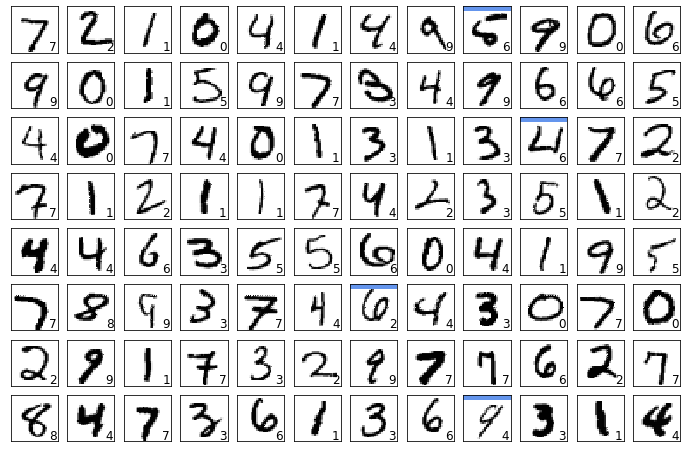

In [14]:
#20160386 somin
#8-1-9
show_prediction()
plt.show()

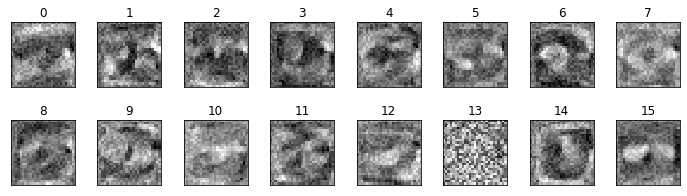

In [15]:
#20160386 somin
#8-1-10
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [16]:
#20160386 somin
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
#20160386 somin
8-2-1
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

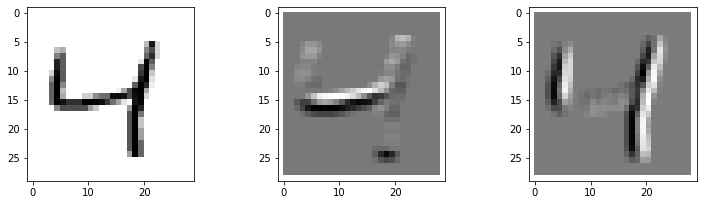

In [2]:
#20160386 somin
8-2-2
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],
                  [1,1,1],
                  [-2,-2,-2]], dtype = float)
myfil2 = np.array([[-2,1,1],
                  [-2,1,1],
                  [-2,1,1]], dtype = float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#filter
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih+1, iw+1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih+1, iw+1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))
        
#display
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.show()

In [3]:
#20160386 somin
8-2-3
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                   verbose=1, validation_data = (x_test, y_test))
score=model.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 7s 112ms/step - loss: 0.8718 - accuracy: 0.7940 - val_loss: 0.3670 - val_accuracy: 0.9004
Epoch 2/20
60/60 [==============================] - 7s 110ms/step - loss: 0.3314 - accuracy: 0.9059 - val_loss: 0.2852 - val_accuracy: 0.9189
Epoch 3/20
60/60 [==============================] - 7s 110ms/step - loss: 0.2735 - accuracy: 0.9222 - val_loss: 0.2474 - val_accuracy: 0.9281
Epoch 4/20
60/60 [==============================] - 7s 110ms/step - loss: 0.2392 - accuracy: 0.9328 - val_loss: 0.2224 - val_accuracy: 0.9364
Epoch 5/20
60/60 [==============================] - 7s 112ms/step - loss: 0.2114 - accuracy: 0.9413 - val_loss: 0.1971 - val_accuracy: 0.9451
Epoch 6/20
60/60 [==============================] - 7s 110ms/step - loss: 0.1866 - accuracy: 0.9482 - val_loss: 0.1777 - val_accuracy: 0.9505
Epoch 7/20
60/60 [==============================] - 7s 112ms/step - loss: 0.1660 - accuracy: 0.9542 - val_loss: 0.1592 - val_accuracy: 0.9572
Epoch 

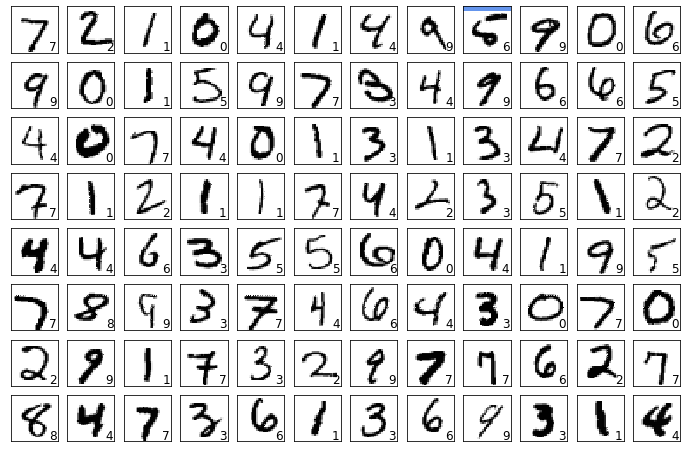

In [6]:
#20160386 somin
8-2-4
show_prediction()
plt.show()

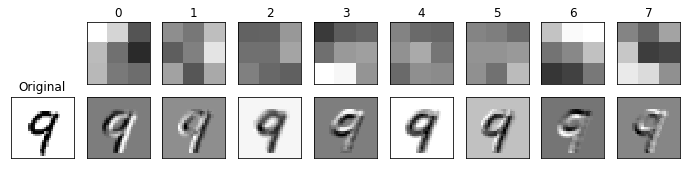

In [7]:
#20160386 somin
8-2-5
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_W = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")
w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin = min_w, vmax = max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    
    #filter
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] =\
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()

In [10]:
#20160386 somin
#8-2-6
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3),
               input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                   verbose=1, validation_data = (x_test, y_test))

score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("Computation time: {0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 44s 733ms/step - loss: 0.6515 - accuracy: 0.8047 - val_loss: 0.1299 - val_accuracy: 0.9621
Epoch 2/20
60/60 [==============================] - 43s 713ms/step - loss: 0.1380 - accuracy: 0.9586 - val_loss: 0.0676 - val_accuracy: 0.9774
Epoch 3/20
60/60 [==============================] - 43s 709ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 4/20
60/60 [==============================] - 43s 710ms/step - loss: 0.0744 - accuracy: 0.9780 - val_loss: 0.0387 - val_accuracy: 0.9863
Epoch 5/20
60/60 [==============================] - 43s 714ms/step - loss: 0.0633 - accuracy: 0.9806 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 6/20
60/60 [==============================] - 43s 714ms/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 7/20
60/60 [==============================] - 43s 712ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0285 - val_accuracy: 0.9909

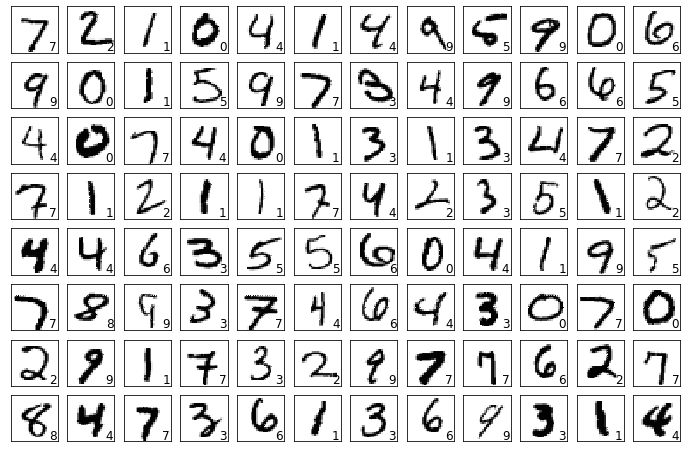

In [11]:
#20160386 somin
# 8-2-7
show_prediction()
plt.show()